## COMP24111 - Exercise 3: _Face recognition_

## 1. Task description

You will work on a face recognition task. The provided dataset includes face images of 40 subjects. There are a total of 400 images, with 10 images per subject. Each image contains 32×32=1024 pixels, with 256 grey levels per pixel.

## 2. Preparation

### Setting up

The functions that you need are defined in the source file we have provided you with. To use them you must import it first:

In [1]:
from lab3lib import load_data, show_single_face, show_faces, partition_data, split_left_right, join_left_right, show_split_faces

Now you can load the data:

In [2]:
data, labels = load_data()
print(data.shape)
print(labels)

(400, 1024)
[ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3
  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
 10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12
 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 15 15 15 15
 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
 17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 20 20
 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22
 22 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24
 25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 26 26 27 27 27 27
 27 27 27 27 27 27 28 28 28 28 28 28 28 28 28 28 29 29 29 29 29 29 29 29
 29 29 30 30 30 30 30 30 30 30 30 30 31 31 31 31 31 31 31 31 31 31 32 32
 32 32 32 32 32 32 32 32 33 33 33 33 33

### Visualising the dataset

You can observe the faces stored in a data matrix by using the functions `show_single_face()` and `show_faces()`.

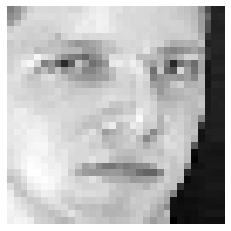

In [3]:
# Display a single example.
show_single_face(data[1, :])

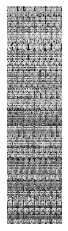

In [4]:
# Display the first 16 examples in a 4x4 grid.
show_faces(data[:, :], num_per_row=10)


### Splitting into train and test set

A data partition function is supplied to facilitate your experiments. It randomly splits the provided data into the training and test sets, where the training set contains $N$ samples per class and the test set contains
the remaining samples. It takes the labels and the specified number $N$ as the input. It returns the sample indices in the training and test set. For example, the following code divides a given set of 400 samples into a training set containing 3 samples per subject and a test set containing 7 samples per subject:

In [21]:

tr_ind, te_ind = partition_data(labels, num_per_class=3)
tr_data = data[tr_ind, :]
tr_label = labels[tr_ind]
te_data = data[te_ind, :]
te_label = labels[te_ind]

## 3. $L_2$-regularised least squares implementation

Now, you will need to implement the function `l2_rls_train` below. It should train a linear model by minimising the $L_2$-regularised sum of squares loss using the normal equations (this is called $L_2$*-regularised least squares model*, or *ridge regression model*). It should support both single-output and multi-output cases. This function should take a set of training samples and a user-specified regularisation parameter $\lambda$ as the input, and return the predicted weights.

In [22]:
import numpy as np

def l2_rls_train(tr_data, tr_labels, lambdda
                ):
    """
    A summary of your function goes here.

    data: type and description of "data"
    labels: type and description of "labels"
    Returns: type and description of the returned variable(s).
    """
    
    # This is just to be consistent with the lecture notes.
    X, y = tr_data, tr_labels
    
    # finding out how many rows the training data has
    n, m = X.shape
    
    # creating a column of ones with the same number of rows as the training data
    columnOfOnes = np.ones((n, 1), dtype=int)

    # Expand X with a column of ones.

    X_tilde = np.hstack((columnOfOnes, X))
    
    if(lambdda == 0):
        w = np.linalg.pinv(X_tilde) @ y
    else:   
        # multiplying X tilde 
        XtimesX =  X_tilde.T @ X_tilde
        # an identity matrix
        lamdaI = np.eye(len(XtimesX)) * lambdda
        Moore_Penroe_with_lambdda = np.linalg.inv((XtimesX + lamdaI)) @ X_tilde.T   
        # Compute the coefficient vector.
        w = Moore_Penroe_with_lambdda @ y
    
    # Return model parameters.
    return w



Once you have trained your model, you can use it on to predict new data. Implement the following function to do this.

In [23]:
def l2_rls_predict(w, data, # Add any other arguments here
                  ):
    """
    A summary of your function goes here.

    data: type and description of "data"

    Returns: type and description of the returned variable(s).
    """
    
    # This is just to be consistent with the lecture notes.
    X = data
    
    n = len(X)
    
    columnOfOnes = np.ones((n, 1), dtype=int)   

    # Expand X with a column of ones.
    # then transpose it  
    X_tilde = np.hstack((columnOfOnes, X))
    
    y_hat = X_tilde @ w
    
    
    return y_hat


In [24]:
w = l2_rls_train(tr_data, tr_label, 0)

## 4. Experiments

Start to use your functions `l2_rls_train` and `l2_rls_predict` to perform the following experiments.

### Experiment 1: Binary Classification

Start with a binary classification task to classify face images for subjects “1” and “30”.

Train three classifiers:
1. Set $y=-1$ for samples from “1” and $y=+1$ for samples from “30” to train a linear model, and use the threshold $T= 0$ to obtain the class prediction.
2. Set $y=0$ for samples from “1” and $y=1$ for samples from “30” to train a linear model, and use the threshold $T= 0.5$ to obtain the class prediction.
2. Set $y=1$ for samples from “1” and $y=30$ for samples from “30” to train a linear model, and use the threshold $T= 15.5$ to obtain the class prediction.

Randomly select 3 images per subject for training, and use the remaining images for testing. Train your classifier 1 and test it with a fixed regularisation parameter $\lambda$=0. Repeat this process 50 times and record the training and test errors.

In [25]:
import numpy as np
from matplotlib import pyplot as plt

def exp1(label_class_1, label_class_30):
    # Map the labels and partition the data
    
    labels_1_and_30 = np.append(labels[np.where(labels == 1)], labels[np.where(labels == 30)])
       
    tr_ind, te_ind = partition_data(labels_1_and_30, num_per_class=3) 
    
    # making sure the indicies reference the correct parts (1 or 30) as it was originall referencing 1 and 2
    # so I had to add on 280 to get it to the correct part    
    
    for indicies in range(2, 6):
        if tr_ind[indicies] >= 10:
            tr_ind[indicies] = tr_ind[indicies] + 280
            

    for indicies in range(7, 14):
        if te_ind[indicies] >= 10:
            te_ind[indicies] = te_ind[indicies] + 280
            
    
    # replacing the 1s and the 30s with label_class_1 and label_class_30 within the testing and the training labels
    # using the np.where function to do this
    tr_data, tr_labels, te_data, te_labels =  data[tr_ind, :], labels[tr_ind], data[te_ind, :], labels[te_ind]
    
    tr_labels = np.where(tr_labels == 1, label_class_1, tr_labels)
    
    tr_labels = np.where(tr_labels == 30, label_class_30, tr_labels)
    
    te_labels = np.where(te_labels == 1, label_class_1, te_labels)
    
    te_labels = np.where(te_labels == 30, label_class_30, te_labels)
    

    # Train your model
    w = l2_rls_train(tr_data, tr_labels, 0)
    
    # Define the threshold
    T = (label_class_1 + label_class_30) / 2 
    
    # Perform prediction for training and compute the training error
    # predicting on the training data
    trainPrediction = l2_rls_predict(w, tr_data) 
    
    # applying the thresholding 
    for index in range(6):
        if trainPrediction[index] < T:
            trainPrediction[index] = label_class_1
        else:
            trainPrediction[index] = label_class_30
    
    
    # intialising variable to count how many there are
    incorrPredic = 0
    # comparing the values to see if it correctly predicts the right one. using int and round so it can be comparable
    
    for index in range(6):
            if trainPrediction[index] != tr_labels[index]:
                incorrPredic += 1     
    
    # dividing the incorrect number of predictions by the total number
    tr_err = incorrPredic / 6
    
    # Perform prediction for testing and compute the test error
    testPrediction = l2_rls_predict(w, te_data)
        
    for index in range(14):
        if testPrediction[index] < T:
            testPrediction[index] = label_class_1
        else:
            testPrediction[index] = label_class_30
            

    # intialising the test prediction counter
    incorrectTestPredict = 0
    incorrectTestPredictClass30 = 0
    incorrectTestPredictClass1 = 0
    # counting how many the implementation incorrectly categorised
    for index in range(14):
        if testPrediction[index] != te_labels[index] and testPrediction[index] == label_class_1:
            incorrectTestPredictClass1 += 1
        elif testPrediction[index] != te_labels[index] and testPrediction[index] == label_class_30:
            incorrectTestPredictClass30 += 1

            
    incorrectTestPredict = incorrectTestPredictClass30 + incorrectTestPredictClass1
    
    
    # dividing the number of incorrect predictions by the total number of predictions
    te_err = incorrectTestPredict / 14
    
    
    return tr_err, te_err

In [26]:
# Use the `exp1()` function to experiment with classifier 1.
# Your code goes here.

class1TestArray = np.array([])
class1TrainArray = np.array([])

for experiments in range (51):
    class1TrainArray = np.append(class1TrainArray, exp1(-1, 1)[0])
    class1TestArray = np.append(class1TestArray, exp1(-1, 1)[1])



Repeat the same experiment for classifier 2.

In [27]:
# Use the `exp1()` function to experiment with classifier 2.
# Your code goes here.
class2TestArray = np.array([])
class2TrainArray = np.array([])

for experiments in range (51):
    class2TrainArray = np.append(class2TrainArray, exp1(0, 1)[0])
    class2TestArray = np.append(class2TestArray, exp1(0, 1)[1])


Repeat the same experiment for classifier 3.

In [28]:
# Use the `exp1()` function to experiment with classifier 3.
# Your code goes here.
class3TestArray = np.array([])
class3TrainArray = np.array([])

for experiments in range (51):
    class3TrainArray = np.append(class3TrainArray, exp1(1, 30)[0])
    class3TestArray = np.append(class3TestArray, exp1(1, 30)[1])


Print the test error mean and standard deviation of the three classifiers and display them in the same plot.

Testing Mean Error Classifier 1: 0.07563025210084033
Testing Standard Deviation Classifier 1: 0.10433938673495335


Testing Mean Error Classifier 2: 0.09243697478991597
Testing Standard Deviation Classifier 2: 0.10892001173794723


Testing Mean Error Classifier 3: 0.06302521008403361
Testing Standard Deviation Classifier 3: 0.07701807890682083


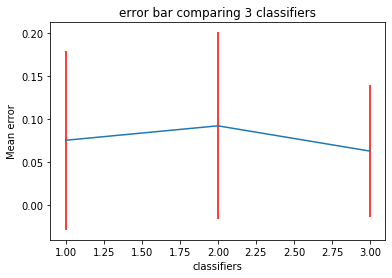

In [29]:
print('Testing Mean Error Classifier 1:', np.mean(class1TestArray))
print('Testing Standard Deviation Classifier 1:', np.std(class1TestArray))
print('\n')

print('Testing Mean Error Classifier 2:', np.mean(class2TestArray))
print('Testing Standard Deviation Classifier 2:', np.std(class2TestArray))
print('\n')
print('Testing Mean Error Classifier 3:', np.mean(class3TestArray))
print('Testing Standard Deviation Classifier 3:', np.std(class3TestArray))

xgraph = np.arange(1, 4, 1)
ygraph = np.array([np.mean(class1TestArray), np.mean(class2TestArray), np.mean(class3TestArray)])
y_error = np.array([np.std(class1TestArray), np.std(class2TestArray), np.std(class3TestArray)])
plt.errorbar(xgraph, ygraph, y_error, ecolor = "r")
plt.title("error bar comparing 3 classifiers")
plt.xlabel("classifiers")
plt.ylabel("Mean error")
plt.show()



Compare the three classifiers and comment on your results.

What training accuracies do you obtain with your linear classifier? Explain the reason.

Between subjects “1” and “30”, which one is more difficult for the linear classifier to recognise? Explain it.

### Experiment 2: Multi-class Classification

Now, proceed to the multi-class classification task to classify face images for all the 40 subjects. Decide an appropriate way to set your target output and make class prediction. 

Split your data to two sets: the training set contains 5 randomly selected images per subject and the test set contains the remaining images. The training set is used to train the model and select hyper-parameter $\lambda$, while the test set is only for final assessment of the trained classifier with the selected $\lambda$. 

Design an appropriate and complete machine learning experiment, which should include the training, hyper-parameter selection and evaluation stages. You can choose from the random subsampling, $k$-fold CV and LOO approaches for hyper-parameter selection. 

Write your code below and make sure it compiles. Show your code to the TA, explain your classifier and experiment design.

In [63]:


def hyperparameter_selection(tr_ind_ex2):
    """
    Finds the best value for lambda using some method of hyperparameter selection.
    """
    # partition data for for 3
    sub_labels = labels[tr_ind_ex2]
    
    tr_train_ind_ex2, te_test_ind_ex2 = partition_data(sub_labels, num_per_class = 3)
    
    
    
    # using the training and testing indicies to find the training and testing data
    trainer_train_data = data[tr_train_ind_ex2, :]
    trainer_test_data = data[te_test_ind_ex2, :]
    # setting the trainer train and testing labels up
    trainer_test_labels = sub_labels[te_test_ind_ex2]
        
    trainer_train_labels = np.zeros((trainer_train_data.shape[0], 40))
    
    valueOfClass = 1
    
    # going through the zero matrix making every 3rd value a one 
    for indexOfMatrix in range(0, trainer_train_labels.shape[0]):
        trainer_train_labels[indexOfMatrix][valueOfClass - 1] = 1
        # if the index of the matrix is divisible by 3 then increase the class number by 1
        if ((indexOfMatrix + 1) % 3 == 0 ):
            valueOfClass += 1
            
    # train takes new training labels which is the zero matrix 
    # use test data for prediction
    
    print(trainer_train_labels.shape)
    # turn the matrix to a vector
    
    # go through the rows of y and then find the maximum argument of that row (this should be the one which is closest to 1)
    
    # find the columns of the row by adding one to the argmax and then compare with the original labels of the matrix 
    
    # then compare the current error (which is the error from the last value of lambda)
    # then if it is smaller than the current error set it as the current error and set it as the best value of lambda so far
        
    currentError = 12
    
    exponenetialDigits = (10 ** exp for exp in range (1, 7))
        
    for hyperParameter in exponenetialDigits:
            
        # training the data using the current hyper parameter
        currentW = l2_rls_train(trainer_train_data, trainer_train_labels, hyperParameter)
        
            
        # predicting using the trainer test data and the currentW
        prediction_matrix = l2_rls_predict(currentW, trainer_test_data)
        
        classPredictions = []
        for index in range(prediction_matrix.shape[0]):
            classPrediction = (np.argmax(prediction_matrix[index])) + 1
            classPredictions.append(classPrediction)
            
        totalErrors = np.sum(classPredictions != trainer_test_labels)
        
        te_error = totalErrors / te_test_ind_ex2.size
        

        if te_error < currentError:
            currentError = te_error
            best_lambda = hyperParameter
            

    return best_lambda




(120, 40)
With hyper parameter 100000 testing error is 0.035
Incorrect classification per person [0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 4]
The subject whcih produced the most errors was:  40


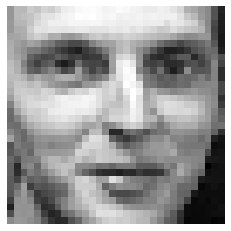

In [82]:
tr_ind_ex2, te_ind_ex2 = partition_data(labels, num_per_class = 5)

tr_data = data[tr_ind_ex2, :]
tr_label = labels[tr_ind_ex2]
te_data = data[te_ind_ex2, :]
te_label = labels[te_ind_ex2]

new_tr_labels = np.zeros((200, 40))

valueOfClass1 = 1

bestlambda = hyperparameter_selection(tr_ind_ex2)

for indexOfMatrix in range( new_tr_labels.shape[0]):
    new_tr_labels[indexOfMatrix][valueOfClass1 - 1] = 1
    # if the index of the matrix is divisible by 3 then increase the class number by 1
    if ((indexOfMatrix + 1) % 5 == 0 ):
        valueOfClass1 += 1
        
w = l2_rls_train(tr_data, new_tr_labels, bestlambda)
        
predictedY = l2_rls_predict(w, te_data)

predictionClass  = np.argmax(predictedY, axis = 1) + 1

te_err = np.mean(predictionClass != te_label)
print("With hyper parameter", bestlambda, "testing error is", te_err)


class_err = np.reshape((predictionClass != te_label).astype(int), [40,5])
totalClassEr = np.sum(class_err, axis = 1)
most_errors = np.argmax(totalClassEr)
print("Incorrect classification per person", totalClassEr)

print("The subject whcih produced the most errors was: ", most_errors + 1)

show_single_face(data[(most_errors * 10), :])

Analyse the classification results, and pick some subjects that are considered the most difficult to recognise by your classifier. Show and explain it to the TA.

### Experiment 3: Face Completion

Revise the “Regression Example II” on face completion in Chapter 2. The task is to guess the 512 pixels of the right face from the 512 pixels of the left face. 

The following command can be used to extract the left and right faces from the input data.

In [ ]:
left, right = split_left_right(data)

And you can visualise them with the function `show_split_faces()`:

In [ ]:
show_split_faces(left[:6, :], num_per_row=3)

Build a face completion model using your functions `l2_rls_train` and `l2_rls_predict`. Design an experiment to assess your model, which should include appropriate training and testing. Use mean absolute percentage error to evaluate the regression performance. You do not need to bother with hyper-parameter selection, but simply set $\lambda$=0.

Write your code below and make sure it compiles. Show your code to the TA, explain your model and experiment design, and demonstrate results.

In [49]:
# partitioning the test and training data so 3 are used for training and 7 used for testing
tr_ind, te_ind = partition_data(labels, num_per_class=3)
tr_data_ex3 = data[tr_ind, :]
# splitting the training data into left and right
tr_data_left_side, tr_data_right_side = split_left_right(tr_data_ex3)
te_data_ex3 = data[te_ind, :]
# splitting the testing data into left and right
te_data_left_side, te_data_right_side = split_left_right(te_data_ex3)

# training the model using the left side training data as the part the model uses to predict
# and the right side as the part the model uses to to match it to
# or the labels 
# but essentially the right side is the target matrix
w = l2_rls_train(tr_data_left_side, tr_data_right_side, 0)

# then getting it to predict using the weights and the testing data 
predicted_face_right_half = l2_rls_predict(w, te_data_left_side)


Visualise and compare the ground truth face (include both the left and right parts) and the completed face (include both the true left and predicted right parts) for 3 randomly chosen testing samples below. You can use `join_left_right(left, right)` to concatenate the left and right halves of a set of faces.

(280, 1024)


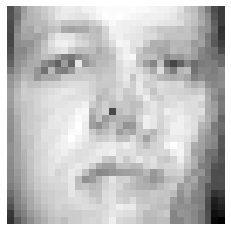

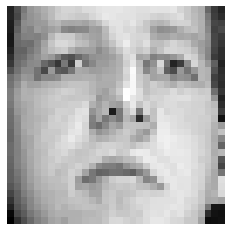

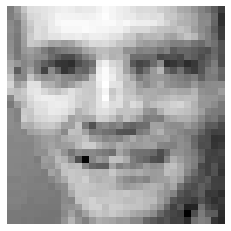

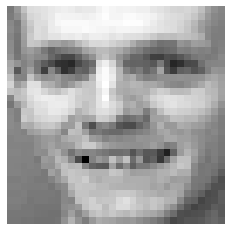

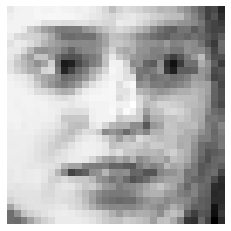

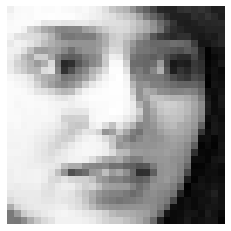

In [50]:
# joining the original left side of the training data and the newly predicted right side
predictedFaceWhole = join_left_right(te_data_left_side, predicted_face_right_half)

print(te_data_ex3.shape)

randomFace1 = np.random.randint(0,20)
randomFace2 = np.random.randint(20,40)
randomFace3 = np.random.randint(40,60)


show_single_face(predictedFaceWhole[randomFace1, :])
show_single_face(te_data_ex3[randomFace1, :])
show_single_face(predictedFaceWhole[randomFace2, :])
show_single_face(te_data_ex3[randomFace2, :])
show_single_face(predictedFaceWhole[randomFace3, :])
show_single_face(te_data_ex3[randomFace3, :])



Does your model work well? Comment on it.

## 5. Deliverables and Marking

By the deadline, you should submit one single Jupyter file using GitLab. Please find the coursework submission instruction from the following link: https://wiki.cs.manchester.ac.uk/index.php/UGHandbook19:Coursework .

This exercise is worth 15 marks – marks will be allocated roughly on the basis of: 
- rigorous experimentation,
- knowledge displayed when talking to the TA,
- problem solving skill,
- self-learning ability,
- how informative and well presented your graphs are,
- language and ease of reading.

You must be able to explain any code you've written in order to get full marks. During the marking session we will ask you to run all cells in your Jupyter file, so ensure that the file is runnable using the "Restart Kernel and Run All Cells" menu option.

The lab is marked out of 15:

|                          |         |
|:------------------------ |--------:|
| $L_2$-RLS Implementation | 3 marks |
| Experiment 1             | 4 marks |
| Experiment 2             | 4 marks |
| Experiment 3             | 4 marks |